# GPA Analysis
This code analyses the GPA of a group of students based on their specialisation, age, gender, school average, level, and branch at school

Advance Special Topics in CS Course

**Dr Mohammad Al-Azawi**

# Get introduced to your data

## Import the libraries and read the data file

In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

df = pd.read_csv('../input/student-gpa/GPA.csv')
df.head()

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
0,CS,F,6,80.0,P,3,20.0,78
1,CS,F,7,82.0,P,4,22.0,73
2,CS,F,4,81.0,P,3,20.0,80
3,CS,M,3,NaN,P,3,22.0,67
4,CS,M,3,NaN,P,3,22.0,67


## Describe the data

In [2]:
df.describe()

,St_Hr,School_AV,level,Age,GPA
count,76.000000,72.000000,76.000000,68.000000,76.000000
mean,4.789474,70.166667,2.736842,21.220588,78.631579
std,1.236293,8.465339,0.929063,1.582041,6.657011
min,3.000000,54.000000,1.000000,18.000000,60.000000
25%,4.000000,65.000000,2.000000,20.000000,75.000000
50%,5.000000,70.000000,3.000000,22.000000,80.000000
75%,6.000000,77.000000,3.000000,22.000000,82.000000
max,7.000000,89.000000,6.000000,25.000000,90.000000


## More information
from the following result you can see that some data counts are less than others, this means that some columns are having NULL values such as Gender (37) which means one value is NULL, (NaN) or missing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Spec       76 non-null     object 
 1   Gender     74 non-null     object 
 2   St_Hr      76 non-null     int64  
 3   School_AV  72 non-null     float64
 4   branch     76 non-null     object 
 5   level      76 non-null     int64  
 6   Age        68 non-null     float64
 7   GPA        76 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 4.9+ KB


# Check for Duplicated rows


## df.duplicated()
This will returns a series which contains (True, False) values. if the row is doublicated it returns True, and False otherwise.

In [4]:
temp = df.duplicated()
temp.head()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [5]:
df[df.duplicated()]

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
4,CS,M,3,NaN,P,3,22.0,67
14,MIS,F,5,76.0,P,3,22.0,81
41,CS,M,3,NaN,P,3,22.0,67
63,BA,M,4,66.0,A,3,22.0,82
73,ACC,F,6,67.0,A,4,22.0,82


## To specify the number of redundant rows we use:
df.duplicated().sum()

In [6]:
df.duplicated().sum()

5

## Drop the redundant rows and keep one only
hint: to consider the rows similar all the values of the columns must be the same

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 75
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Spec       71 non-null     object 
 1   Gender     69 non-null     object 
 2   St_Hr      71 non-null     int64  
 3   School_AV  69 non-null     float64
 4   branch     71 non-null     object 
 5   level      71 non-null     int64  
 6   Age        63 non-null     float64
 7   GPA        71 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 5.0+ KB


# Check for NULL, NaN or missing values

## isna()
this returns a series of True or False, if the row has NaN value it returns True otherwise it returns False. To find the number of rows with null values in each feature, you need to use 
## df.isna().sum()

In [10]:
temp = df.isna()
temp.head()

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

Spec         0
Gender       2
St_Hr        0
School_AV    2
branch       0
level        0
Age          8
GPA          0
dtype: int64

from the result above it is clear that there are some Na values:
1 value is missing in the Gender
1 value is missing in the School_Av
4 Valuses are missing in the Age

## Droping the rows with missing values
one of the method which must be used carefully is droping the rows with missing values
this method is not recommended always and can be used in certain cases only
this can be done using the instruction:

df.drop_duplicates(inplace = True)

## Replacing the missing values with constant value, Mean, Median, or Mode


### Replcaing with constant value
it is possible to replace the missing value with constant value in some cases such as replacing the Missing value in the gender with Male ot Female, but this if we are somehow certain of the gender otherwise it is not recommended. Instead we need to use other approaches.

### Replacing with Mean, Median, Mode
According to the nature of the deature, we can replace the missing value with Mean, Median, or Mode. 

### Age missing value
lets do some calculations to see which method is better

Calculating the mean, median, and mode for all students

In [12]:
mean = df['Age'].mean()
median = df['Age'].median()
mode = df['Age'].mode()[0]

print (mean, median, mode)

21.158730158730158 21.0 20.0


Let us study the relationship between the Age and other features. 
it is clear that there is a relationship between the age and the level
### Calculating the mean, median, and mode based on the level

In [13]:
df1 = df[df['Age'].isna()]
df1

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
11,MIS,F,7,71.0,A,2,NaN,84
26,BA,F,3,71.0,A,3,NaN,77
31,ACC,F,3,57.0,A,2,NaN,82
36,ACC,M,5,58.0,A,2,NaN,88
49,MIS,F,7,72.0,A,2,NaN,84
64,BA,F,6,70.0,A,3,NaN,77
69,ACC,F,5,67.0,A,2,NaN,82
74,ACC,M,6,68.0,A,2,NaN,88


### Finding the mode of the level 
this will show the rows with missing values majority levels

In [14]:
df1['level'].mode()[0]

2

Now we calculate the mean, median, and mode for the students in level 2 only

In [15]:
df2 = df[df['level']==2]
df2

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
5,CS,F,6,80.0,P,2,19.0,77
6,CS,F,6,80.0,P,2,19.0,65
8,CS,M,5,70.0,P,2,19.0,70
11,MIS,F,7,71.0,A,2,NaN,84
15,MIS,F,4,75.0,P,2,20.0,80
19,MIS,F,7,82.0,A,2,20.0,88
20,MIS,M,4,72.0,P,2,19.0,75
21,BA,F,5,54.0,A,2,20.0,89
28,BA,F,5,66.0,A,2,20.0,82
30,ACC,F,3,56.0,A,2,20.0,90


In [16]:
mean = df2['Age'].mean()
median = df2['Age'].median()
mode = df2['Age'].mode()[0]

print (mean, median, mode)

19.72222222222222 20.0 20.0


In [17]:
df

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
0,CS,F,6,80.0,P,3,20.0,78
1,CS,F,7,82.0,P,4,22.0,73
2,CS,F,4,81.0,P,3,20.0,80
3,CS,M,3,NaN,P,3,22.0,67
5,CS,F,6,80.0,P,2,19.0,77
...,...,...,...,...,...,...,...,...
70,ACC,F,5,65.0,A,3,22.0,81
71,ACC,F,5,64.0,A,4,23.0,83
72,ACC,F,6,67.0,A,4,22.0,82
74,ACC,M,6,68.0,A,2,NaN,88


In [18]:
df["Age"].fillna(median, inplace = True)

In [19]:
df

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
0,CS,F,6,80.0,P,3,20.0,78
1,CS,F,7,82.0,P,4,22.0,73
2,CS,F,4,81.0,P,3,20.0,80
3,CS,M,3,NaN,P,3,22.0,67
5,CS,F,6,80.0,P,2,19.0,77
...,...,...,...,...,...,...,...,...
70,ACC,F,5,65.0,A,3,22.0,81
71,ACC,F,5,64.0,A,4,23.0,83
72,ACC,F,6,67.0,A,4,22.0,82
74,ACC,M,6,68.0,A,2,20.0,88


In [20]:
df.isna().sum()

Spec         0
Gender       2
St_Hr        0
School_AV    2
branch       0
level        0
Age          0
GPA          0
dtype: int64

### Gender Missing Value

In [21]:
gen = df['Gender'].mode()[0]
gen

'F'

In [22]:
df["Gender"].fillna(gen, inplace = True)

In [23]:
df.isna().sum()

Spec         0
Gender       0
St_Hr        0
School_AV    2
branch       0
level        0
Age          0
GPA          0
dtype: int64

In [24]:
df1=df[ df['School_AV'].isna()]
df1

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
3,CS,M,3,NaN,P,3,22.0,67
42,CS,M,3,NaN,P,3,22.0,64


In [25]:
maj = df1['Spec'].mode()[0]
maj

'CS'

In [26]:
df2 =df[df['Spec'] == maj]
df2

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
0,CS,F,6,80.0,P,3,20.0,78
1,CS,F,7,82.0,P,4,22.0,73
2,CS,F,4,81.0,P,3,20.0,80
3,CS,M,3,NaN,P,3,22.0,67
5,CS,F,6,80.0,P,2,19.0,77
6,CS,F,6,80.0,P,2,19.0,65
7,CS,F,7,81.0,P,4,23.0,72
8,CS,M,5,70.0,P,2,19.0,70
9,CS,M,6,77.0,P,1,18.0,76
10,CS,F,3,81.0,P,1,20.0,65


### School Average Missing value
the mean, median, or the mode, for all students can be considered. However, each specialisation may take differen school average, therefore, it is better to calculate the mean, median, and the mode for the specialisation of the missing value.

In [27]:
# All Specialisations
mean = df['School_AV'].mean()
median = df['School_AV'].median()
mode = df['School_AV'].mode()[0]
print (mean, median, mode)

70.18840579710145 70.0 66.0


In [28]:
mean = df2['School_AV'].mean()
median = df2['School_AV'].median()
mode = df2['School_AV'].mode()[0]
print (mean, median, mode)

77.33333333333333 80.0 81.0


In [29]:
df['School_AV'].fillna(mean, inplace = True)

In [30]:
df

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA
0,CS,F,6,80.000000,P,3,20.0,78
1,CS,F,7,82.000000,P,4,22.0,73
2,CS,F,4,81.000000,P,3,20.0,80
3,CS,M,3,77.333333,P,3,22.0,67
5,CS,F,6,80.000000,P,2,19.0,77
...,...,...,...,...,...,...,...,...
70,ACC,F,5,65.000000,A,3,22.0,81
71,ACC,F,5,64.000000,A,4,23.0,83
72,ACC,F,6,67.000000,A,4,22.0,82
74,ACC,M,6,68.000000,A,2,20.0,88


In [31]:
df.isna().sum()

Spec         0
Gender       0
St_Hr        0
School_AV    0
branch       0
level        0
Age          0
GPA          0
dtype: int64

# Realtionships

In [32]:
df.corr()

,St_Hr,School_AV,level,Age,GPA
St_Hr,1.000000,0.265047,0.066822,-0.181647,0.190796
School_AV,0.265047,1.000000,0.047916,-0.049895,-0.421351
level,0.066822,0.047916,1.000000,0.694610,0.051540
Age,-0.181647,-0.049895,0.694610,1.000000,0.019776
GPA,0.190796,-0.421351,0.051540,0.019776,1.000000


In [33]:
df.corr()['GPA']

St_Hr        0.190796
School_AV   -0.421351
level        0.051540
Age          0.019776
GPA          1.000000
Name: GPA, dtype: float64

In [34]:
F = df['Gender']=='F'
F.head()

0     True
1     True
2     True
3    False
5     True
Name: Gender, dtype: bool

In [35]:
F= F.astype(int)
F.head()

0    1
1    1
2    1
3    0
5    1
Name: Gender, dtype: int64

In [36]:
df['G_Code'] = F
df.head()

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA,G_Code
0,CS,F,6,80.000000,P,3,20.0,78,1
1,CS,F,7,82.000000,P,4,22.0,73,1
2,CS,F,4,81.000000,P,3,20.0,80,1
3,CS,M,3,77.333333,P,3,22.0,67,0
5,CS,F,6,80.000000,P,2,19.0,77,1


In [37]:
df.corr()['GPA']

St_Hr        0.190796
School_AV   -0.421351
level        0.051540
Age          0.019776
GPA          1.000000
G_Code       0.150349
Name: GPA, dtype: float64

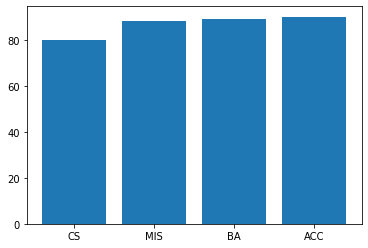

In [38]:
import matplotlib.pyplot as plt
x = df['Spec']
y = df['GPA']
plt.bar(x, y)
plt.show()

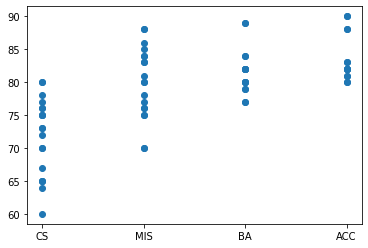

In [39]:
x = df['Spec']
y = df['GPA']
plt.scatter(x, y)
plt.show()

In [40]:
df = df.reset_index(drop = True)
df

,Spec,Gender,St_Hr,School_AV,branch,level,Age,GPA,G_Code
0,CS,F,6,80.000000,P,3,20.0,78,1
1,CS,F,7,82.000000,P,4,22.0,73,1
2,CS,F,4,81.000000,P,3,20.0,80,1
3,CS,M,3,77.333333,P,3,22.0,67,0
4,CS,F,6,80.000000,P,2,19.0,77,1
...,...,...,...,...,...,...,...,...,...
66,ACC,F,5,65.000000,A,3,22.0,81,1
67,ACC,F,5,64.000000,A,4,23.0,83,1
68,ACC,F,6,67.000000,A,4,22.0,82,1
69,ACC,M,6,68.000000,A,2,20.0,88,0


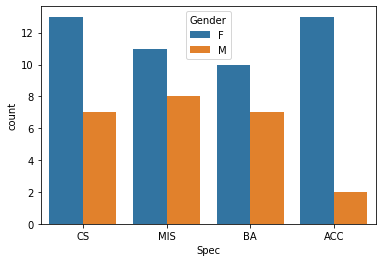

In [41]:
ax = sns.countplot(data=df,x='Spec', hue='Gender')


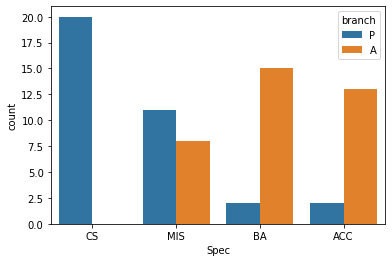

In [42]:
ax = sns.countplot(data=df,x='Spec', hue='branch')

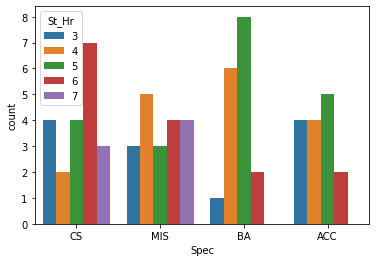

In [43]:
ax = sns.countplot(data=df,x='Spec', hue='St_Hr')


Text(0.5, 1.05, 'Pearson Correlation of Features')

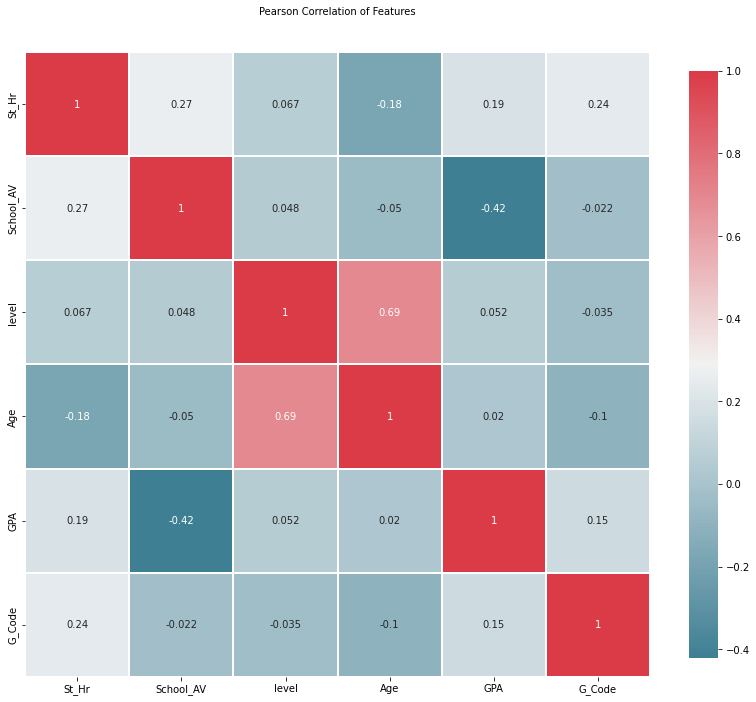

In [44]:
_ , ax = plt.subplots(figsize =(14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
_ = sns.heatmap( df.corr(), cmap = colormap, square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='white', annot_kws={'fontsize':10 })
    
plt.title('Pearson Correlation of Features', y=1.05, size=10)

In [45]:
sp = df['Spec'].unique()
av = []
SH = []
SCAV = []
LEV = []
AGE = []
GPA = []
for ss in sp:
    mc = df[df['Spec'] == ss].mean()
    av.append(mc)
for i in range (0, len(sp)):
    SH.append (av[i]['St_Hr'])
    SCAV.append (av[i]['School_AV'])
    LEV.append ( av[i]['level'])
    AGE.append ( av[i]['Age'])
    GPA.append ( av[i]['GPA'])

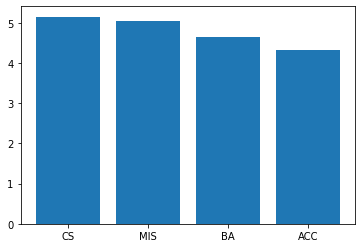

In [46]:
x = sp
y = SH
plt.bar(x, y)
plt.show()

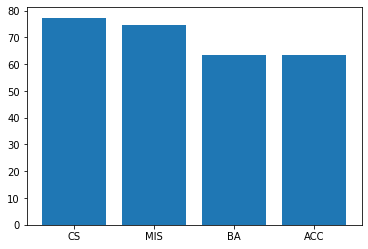

In [47]:
x = sp
y = SCAV
plt.bar(x, y)
plt.show()

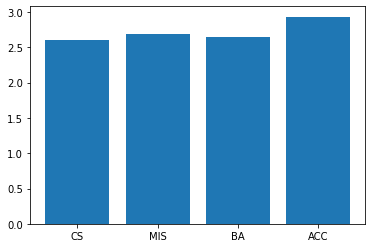

In [48]:
x = sp
y = LEV
plt.bar(x, y)
plt.show()

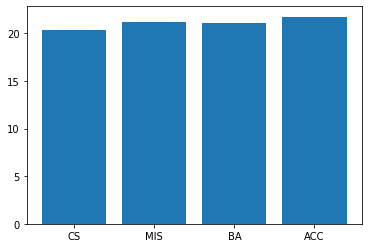

In [49]:
x = sp
y = AGE
plt.bar(x, y)
plt.show()

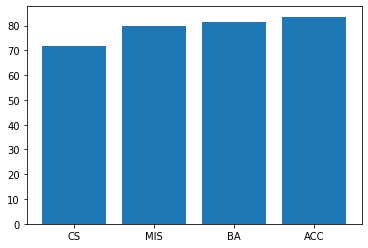

In [50]:
x = sp
y = GPA
plt.bar(x, y)
plt.show()